In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
import sys
sys.path.insert(0, "/cellar/users/mpagadal/Programs/anaconda3/lib/python3.7/site-packages")
from sklearn import linear_model
from regressors import stats
import statsmodels.api as sm

## Get PCA associated SNPs

In [4]:
snps=pd.read_csv("/cellar/users/mpagadal/Data2/projects/germline-immune/snp-tables/immune-microenvironment-pc.tsv",delimiter="\t")

In [5]:
pc1_snps=snps[snps["pc"]=="PC1"]["ID"].tolist()
pc2_snps=snps[snps["pc"]=="PC2"]["ID"].tolist()

## Burden analysis for Macrophage Regulation SNPs

In [19]:
def make_burden(raw,snps,pheno):
    #get genotype file
    raw=pd.read_csv(raw,delim_whitespace=True)
    raw=raw.set_index("FID")
    raw=raw.iloc[:,5:]
    raw.columns=[x.split("_")[0] for x in raw.columns]
    
    #switch alleles so all are in same direction
    pheno=pd.read_csv(pheno,delimiter="\t")
    pheno=pheno[pheno["TEST"]=="ADD"]
    pheno=pheno[pheno["ID"].isin(snps)]
    
    print(len(snps))
    
    up=pheno[pheno["BETA"]>0]["ID"].tolist()
    down=pheno[pheno["BETA"]<0]["ID"].tolist()
    
    for x in down:
        mp={0:2,1:1,2:0}
        raw[x]=raw[x].map(mp)
    
    raw_burden=raw[up+down]
    raw_burden["score"]=raw_burden.sum(axis=1)/(2*len(snps))
    return(raw_burden)

In [20]:
mac_burden=make_burden("/nrnb/users/mpagadal/tcga-genotypes/germline-immune/immune.snp.raw",pc1_snps,"../associations/mac-reg/Macrophage.Regulation.Macrophage.Regulation.glm.linear")

28


/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [21]:
pheno=pd.read_csv("/cellar/users/mpagadal/Data2/projects/germline-immune/discovery/phenotypes/processed_phenos/tpm/tumor/pheno_all_zcancer",delimiter="\t")

In [22]:
mac_burden=mac_burden.reset_index()
raw_pheno=pd.merge(mac_burden,pheno,on="FID",how="left")

In [26]:
raw_pheno=raw_pheno[raw_pheno["Macrophage.Regulation"]!=-9]
raw_pheno=raw_pheno[~(raw_pheno["Macrophage.Regulation"].isnull())]

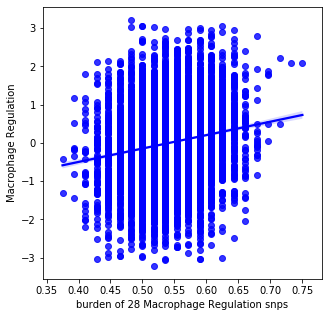

In [27]:
f=plt.figure(figsize=(5,5))
sns.regplot(x="score",y="Macrophage.Regulation",data=raw_pheno,color="blue")
plt.xlabel("burden of 28 Macrophage Regulation snps")
plt.ylabel("Macrophage Regulation")
plt.savefig("../plots/macrophage-burden.pdf")

In [28]:
ols = linear_model.LinearRegression()
X=raw_pheno["score"].values.reshape(-1, 1)
y=raw_pheno["Macrophage.Regulation"].values.reshape(-1, 1)
        
X = sm.add_constant(X)
        
model=sm.OLS(y,X)
results=model.fit()

print(results.pvalues[1],results.params[1])

3.115723407410179e-50 3.509041434727349


## Burden analysis for EP300 SNPs

In [30]:
ep300_burden=make_burden("/nrnb/users/mpagadal/tcga-genotypes/germline-immune/immune.snp.raw",pc2_snps,"../associations/ep300/EP300.EP300.glm.linear")

13


/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
pheno=pd.read_csv("/cellar/users/mpagadal/Data2/projects/germline-immune/discovery/phenotypes/processed_phenos/tpm/tumor/pheno_all_zcancer",delimiter="\t")

In [32]:
ep300_burden=ep300_burden.reset_index()
raw_pheno=pd.merge(ep300_burden,pheno,on="FID",how="left")

In [33]:
raw_pheno=raw_pheno[raw_pheno["EP300"]!=-9]
raw_pheno=raw_pheno[~(raw_pheno["EP300"].isnull())]

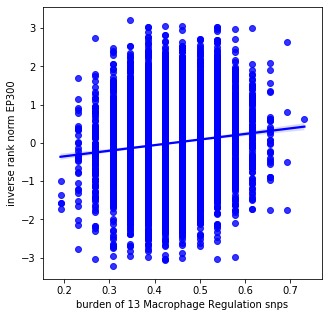

In [34]:
f=plt.figure(figsize=(5,5))
sns.regplot(x="score",y="EP300",data=raw_pheno,color="blue")
plt.xlabel("burden of 13 Macrophage Regulation snps")
plt.ylabel("inverse rank norm EP300")
plt.savefig("../plots/ep300-burden.pdf")

In [35]:
ols = linear_model.LinearRegression()
X=raw_pheno["score"].values.reshape(-1, 1)
y=raw_pheno["EP300"].values.reshape(-1, 1)
        
X = sm.add_constant(X)
        
model=sm.OLS(y,X)
results=model.fit()

print(results.pvalues[1],results.params[1])

2.4735582798651463e-21 1.4658659593492769
